# Задание к уроку 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [462]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[34, 67, 82, ..., 44, 25, 65],
       [42, 80, 74, ..., 69, 13, 87],
       [64, 16, 73, ..., 90, 15,  7],
       ...,
       [63, 25, 71, ..., 33, 68, 12],
       [ 1, 47, 95, ..., 81, 27, 12],
       [20, 99, 79, ...,  2, 30,  4]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке    
#shuffle перемешивает только по 1 оси(строки), поэтому сначала транспонируем, перемешиваем и транспонируем обратно

In [463]:
A_transpon = A.copy().T
np.random.shuffle(A_transpon)
A_transpon = A_transpon.T
A_transpon

array([[ 4, 60, 88, ..., 26, 84, 44],
       [ 8, 22, 48, ..., 82, 68, 62],
       [35,  6, 63, ..., 60, 85, 91],
       ...,
       [37,  6, 32, ..., 32, 73, 97],
       [82, 46, 91, ..., 14, 92, 71],
       [66, 67, 96, ..., 24,  4, 71]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) #Т.е. сумма четных эл-ов (по строчкам) > среднего(суммы по нечетным столбцам)

In [464]:
C = A[:, 1::2].sum(axis = 1)
z = C.mean()
z

1229.99

In [465]:
A[:, ::2].sum(axis = 1)

array([1352, 1232, 1243, 1145, 1219,  827, 1134, 1072, 1207, 1396, 1273,
       1065, 1388, 1176, 1109, 1274, 1141, 1088, 1286, 1401, 1027, 1188,
       1224, 1388, 1119, 1347, 1039, 1074, 1283, 1222, 1377, 1269, 1298,
       1140,  959, 1071, 1433, 1196, 1079, 1090, 1074, 1005, 1250, 1584,
       1344, 1572, 1238, 1189, 1225, 1405,  920, 1191, 1140, 1274, 1401,
       1317, 1356, 1335, 1244, 1093, 1326, 1335, 1291, 1161,  985, 1066,
       1119, 1144, 1315, 1172, 1247, 1309, 1113, 1043, 1051, 1105, 1188,
       1254, 1258, 1382, 1449, 1203, 1370, 1061, 1045, 1399, 1168, 1302,
       1180, 1094, 1281,  830,  987, 1263, 1266, 1362, 1149, 1235, 1099,
       1487, 1066, 1244, 1224, 1376, 1222, 1106, 1340, 1223, 1203,  908,
        982,  983,  986, 1106, 1182, 1265, 1074, 1388, 1232, 1259, 1287,
       1157, 1223, 1113,  826, 1452, 1216, 1248, 1240, 1299, 1172, 1306,
       1558, 1289, 1135, 1105, 1759, 1148, 1163, 1335, 1146, 1270, 1129,
       1254, 1378,  960, 1176, 1097, 1192, 1046, 10

In [466]:
V = A[(A[:, ::2].sum(axis = 1))>z]
V

array([[34, 67, 82, ..., 44, 25, 65],
       [42, 80, 74, ..., 69, 13, 87],
       [64, 16, 73, ..., 90, 15,  7],
       ...,
       [81, 74, 60, ..., 62, 78,  0],
       [63, 25, 71, ..., 33, 68, 12],
       [ 1, 47, 95, ..., 81, 27, 12]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна. 
#Создаем вектор с разницами максимального эл. и минимального. Функция argmax() возвращает индекс максимального значения вдоль указанной оси.

In [467]:
vector_max_min = A.max(axis = 1) - A.min(axis = 1) 
vector_max_min

array([99, 97, 91, 97, 93, 97, 98, 98, 99, 99, 98, 96, 98, 96, 89, 97, 97,
       98, 97, 94, 98, 98, 99, 97, 99, 97, 90, 89, 97, 97, 98, 96, 97, 96,
       95, 98, 94, 99, 99, 95, 97, 95, 99, 96, 99, 98, 98, 97, 99, 97, 93,
       98, 89, 97, 98, 99, 94, 97, 97, 99, 95, 99, 94, 96, 97, 98, 99, 97,
       99, 99, 94, 96, 96, 97, 96, 89, 96, 95, 94, 99, 95, 95, 93, 97, 96,
       92, 95, 94, 95, 96, 97, 99, 96, 95, 96, 96, 90, 99, 91, 97, 98, 94,
       97, 99, 94, 98, 94, 97, 96, 99, 95, 98, 93, 98, 97, 96, 96, 98, 98,
       97, 97, 95, 99, 99, 97, 96, 96, 99, 96, 94, 99, 96, 98, 96, 98, 98,
       90, 96, 98, 96, 96, 95, 97, 94, 89, 99, 97, 93, 97, 94, 99, 96, 95,
       98, 97, 99, 98, 95, 94, 96, 97, 98, 96, 99, 97, 99, 96, 94, 95, 98,
       96, 98, 96, 99, 98, 92, 89, 96, 99, 93, 94, 96, 97, 96, 99, 97, 97,
       99, 99, 99, 98, 93, 99, 96, 99, 97, 95, 94, 99, 99])

In [468]:
np.argmax(vector_max_min)

0

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*
#Решение: 1. Делаем одномерный массив из исходного. 2. Применяем argsort, кладем рез-т в mask. 3. Создаем новый массив N с mask и длинной первоначального, к элементам +1. 4. Делаем такую же размерность

In [469]:
B = A.copy()
B = B.reshape(-1)
B

array([34, 67, 82, ...,  2, 30,  4])

In [470]:
temp = B.argsort()
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(B)) + 1
ranks.reshape(A.shape)

array([[3526, 6785, 8247, ..., 4500, 2622, 6627],
       [4301, 8093, 7452, ..., 6977, 1347, 8796],
       [6462, 1713, 7378, ..., 9019, 1603,  730],
       ...,
       [6368, 2636, 7161, ..., 3428, 6865, 1266],
       [ 167, 4889, 9539, ..., 8195, 2808, 1262],
       [2119, 9915, 7945, ...,  294, 3107,  459]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [471]:
data_norm = (A - A.min ())/ (A.max() - A.min())
data_norm

array([[0.34343434, 0.67676768, 0.82828283, ..., 0.44444444, 0.25252525,
        0.65656566],
       [0.42424242, 0.80808081, 0.74747475, ..., 0.6969697 , 0.13131313,
        0.87878788],
       [0.64646465, 0.16161616, 0.73737374, ..., 0.90909091, 0.15151515,
        0.07070707],
       ...,
       [0.63636364, 0.25252525, 0.71717172, ..., 0.33333333, 0.68686869,
        0.12121212],
       [0.01010101, 0.47474747, 0.95959596, ..., 0.81818182, 0.27272727,
        0.12121212],
       [0.2020202 , 1.        , 0.7979798 , ..., 0.02020202, 0.3030303 ,
        0.04040404]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [472]:
A

array([[34, 67, 82, ..., 44, 25, 65],
       [42, 80, 74, ..., 69, 13, 87],
       [64, 16, 73, ..., 90, 15,  7],
       ...,
       [63, 25, 71, ..., 33, 68, 12],
       [ 1, 47, 95, ..., 81, 27, 12],
       [20, 99, 79, ...,  2, 30,  4]])

In [473]:
# # # massiv_3 = np.zeros((10, 20, 5))
# massiv_n = np.arange(1, 11)

# # massiv_n = massiv_n.reshape(3, 5)
# array_rep = np.repeat(massiv_n, 15)
# A2 = np.full_like(array_rep, A)
# array_rep



# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [474]:
group_even = A[:, 0::2]
group_odd = A[:, 1::2]
np.concatenate((group_even, group_odd), axis=1)

array([[34, 82, 61, ..., 95, 44, 65],
       [42, 74, 49, ..., 42, 69, 87],
       [64, 73, 18, ..., 23, 90,  7],
       ...,
       [63, 71, 65, ..., 89, 33, 12],
       [ 1, 95, 71, ..., 49, 81, 12],
       [20, 79, 66, ..., 78,  2,  4]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [475]:
A

array([[34, 67, 82, ..., 44, 25, 65],
       [42, 80, 74, ..., 69, 13, 87],
       [64, 16, 73, ..., 90, 15,  7],
       ...,
       [63, 25, 71, ..., 33, 68, 12],
       [ 1, 47, 95, ..., 81, 27, 12],
       [20, 99, 79, ...,  2, 30,  4]])

In [476]:
count = 0
array_bool = A>5
rows, columns = array_bool.shape
for i in range(rows):
    if np.all(array_bool[i], axis= 0) == True:
        count += 1
count

6

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [477]:
A1, A2, A3, A4, A5, A6, A7, A8, A9, A10 = np.split(A, 10)
A11 = (A1+ A2+ A3+ A4+ A5+ A6+ A7+ A8+ A9+ A10) / 10
A11

array([[37. , 66.8, 59.5, 40.6, 55.5, 37.5, 48.6, 48.1, 58.4, 49.9, 35.4,
        47.4, 54.8, 39.7, 40.7, 51.9, 52.3, 37.9, 57. , 45.4, 46.2, 57. ,
        52.8, 50.1, 38. , 43.5, 48.5, 58. , 44.9, 57.6, 53.8, 50.5, 56.9,
        46.8, 57.5, 41.8, 57.3, 36.2, 46.9, 62.7, 47.3, 50.1, 32.9, 41.5,
        52.7, 47.9, 50.6, 58.1, 38.3, 44.3],
       [38.8, 55.2, 35.5, 40.8, 56.8, 45.8, 49.1, 43.7, 45.3, 51.6, 45. ,
        51.7, 54.5, 57.6, 43.2, 37.5, 52.1, 39.8, 32. , 47.7, 45.8, 46.1,
        47.7, 29.9, 57.9, 41.4, 39.8, 34.6, 53.9, 50.4, 50.8, 45.3, 60.4,
        59.4, 49.9, 67.3, 37.8, 60.2, 45.2, 63.6, 43.3, 52.3, 46.8, 47.6,
        48.7, 31. , 58.1, 65.4, 56.5, 54.8],
       [53.7, 31.7, 60. , 59.9, 34.7, 48.7, 60.5, 57. , 58.2, 47.2, 49.6,
        44.2, 47.4, 62.3, 57.4, 46.8, 59.5, 51.4, 32. , 64.2, 47.5, 51.1,
        49. , 39.9, 52.3, 54.3, 43.7, 62.2, 43. , 32.2, 52.7, 48.9, 49.4,
        39.8, 55.9, 50.7, 54.7, 42.5, 70.4, 40. , 62.9, 44.3, 42.8, 55. ,
        44.8, 46.2, 61

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [478]:
A

array([[34, 67, 82, ..., 44, 25, 65],
       [42, 80, 74, ..., 69, 13, 87],
       [64, 16, 73, ..., 90, 15,  7],
       ...,
       [63, 25, 71, ..., 33, 68, 12],
       [ 1, 47, 95, ..., 81, 27, 12],
       [20, 99, 79, ...,  2, 30,  4]])

In [479]:
unique_array = A.copy()
unique_array = unique_array.reshape(-1)

x, indexes = np.unique(unique_array, return_index=True)

unique_array = [unique_array[index] for index in sorted(indexes)]
unique_array = np.array(unique_array)
unique_array


array([34, 67, 82,  0, 61, 58, 14, 35, 84, 96, 59, 68,  3, 48, 19, 65, 79,
        4,  9, 60, 49, 86, 23, 16, 88, 62, 97, 94, 38, 26, 43, 63, 74, 44,
       57, 21, 70, 95, 99, 25, 42, 80, 13, 15, 73, 85, 17, 10, 69, 78, 22,
        1, 54, 11,  8, 72, 41, 81, 24, 71, 93, 90, 31, 28, 45,  7, 37, 87,
       64, 18, 52, 56, 12,  6, 39, 32, 91, 40, 30, 47, 33, 77,  2, 92, 51,
       36, 29, 27, 53, 76, 55, 50, 20,  5, 46, 98, 66, 75, 83, 89])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A` (средний т.е арифметическое среднее) # между соответствующей строкой `A`  - это ИНДЕКСОМ строки????

In [480]:
c1 = A.copy()
c1_x, c2_y = c1.shape
c2 = c1.mean(axis = 0) 

# c3 = np.repeat(c2, c1_x)
# c4 = c3.reshape(c1_x, c2_y)

# def dist_pairwise(a, b):
#      P = np.add.outer(np.sum(a**2, axis=0), np.sum(b**2, axis=0))
#      N = np.dot(a, b.T)
#      return np.sqrt(P - 2*N)
# dist_pairwise(c1, c4)


# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [481]:
A

array([[34, 67, 82, ..., 44, 25, 65],
       [42, 80, 74, ..., 69, 13, 87],
       [64, 16, 73, ..., 90, 15,  7],
       ...,
       [63, 25, 71, ..., 33, 68, 12],
       [ 1, 47, 95, ..., 81, 27, 12],
       [20, 99, 79, ...,  2, 30,  4]])

In [482]:
array2 = np.where(A < 50, A*2, A*3)
array2

array([[ 68, 201, 246, ...,  88,  50, 195],
       [ 84, 240, 222, ..., 207,  26, 261],
       [192,  32, 219, ..., 270,  30,  14],
       ...,
       [189,  50, 213, ...,  66, 204,  24],
       [  2,  94, 285, ..., 243,  54,  24],
       [ 40, 297, 237, ...,   4,  60,   8]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [483]:
x = A.copy()
x = x.reshape(-1)
x

def moving_avg(x, n):
  my_cumsum = np.cumsum(np.insert(x, 0, 0)) 
  return (my_cumsum[n:] - my_cumsum[:-n]) / float(n)

n = 3
X1 = moving_avg(x, n)

n = 5
X2 = moving_avg(x, n)
X2 = np.append(X2, (0, 0))

n = 10
X3 = moving_avg(x, n)
X3 = np.append(X3, (0, 0, 0, 0, 0, 0, 0))

result = X1 + X2 + X3
result

array([162.9       , 158.86666667, 146.36666667, ...,  96.93333333,
        40.33333333,  12.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике.

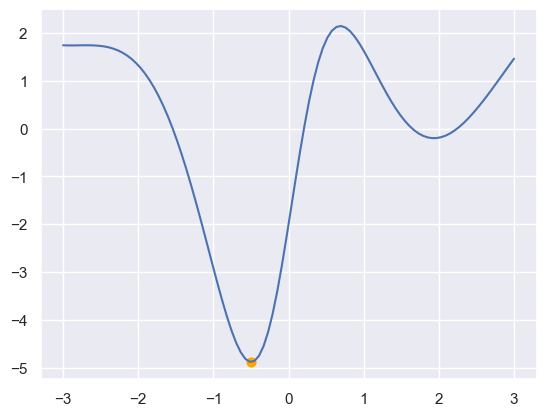

In [484]:
from scipy.optimize import minimize_scalar
y = lambda x: ( ((5*np.sin(2*x)) - np.cos(x)**2 - 1 + np.abs(x**3) - x**2) / ((x**2)+1) )
x = np.linspace(-3, 3,100)
plt.plot(x, y(x))
res = minimize_scalar(y)
res.fun
res.x
plt.scatter(res.x, res.fun, color='orange', s=40, marker='o')
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [485]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 1, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [486]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1911

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 